In [102]:
#Load the necesssary libraries
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster
import seaborn as sns
%matplotlib inline

#### We will start the process by loading the cleaned datasets of Arabica and Robusta.

In [2]:
#Load the datasets
df_arabica=pd.read_csv('arabica_data_cleaned.csv',index_col=[0])
df_robusta=pd.read_csv('robusta_data_cleaned.csv',index_col=[0])

In [3]:
#Let us explore the top 5 rows of arabica dataset
df_arabica.head()

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [4]:
#Let us explore the top 5 rows of robusta dataset
df_robusta.head()

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,Robusta,ankole coffee producers coop,Uganda,kyangundu cooperative society,NaN,ankole coffee producers,0,ankole coffee producers coop,1488,sheema south western,...,Green,2,"June 26th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1488.0,1488.0,1488.0
2,Robusta,nishant gurjer,India,sethuraman estate kaapi royale,25,sethuraman estate,14/1148/2017/21,kaapi royale,3170,chikmagalur karnataka indua,...,NaN,2,"October 31st, 2018",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,3170.0,3170.0,3170.0
3,Robusta,andrew hetzel,India,sethuraman estate,NaN,NaN,0000,sethuraman estate,1000m,chikmagalur,...,Green,0,"April 29th, 2016",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,1000.0,1000.0,1000.0
4,Robusta,ugacof,Uganda,ugacof project area,NaN,ugacof,0,ugacof ltd,1212,central,...,Green,7,"July 14th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1212.0,1212.0,1212.0
5,Robusta,katuka development trust ltd,Uganda,katikamu capca farmers association,NaN,katuka development trust,0,katuka development trust ltd,1200-1300,luwero central region,...,Green,3,"June 26th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1200.0,1300.0,1250.0


#### Let us combine both the datasets for understanding Robusta and Arabica distributions and perform EDA. For that we need to change the columns of Robusta dataset to match with Arabica.

In [5]:
#change the column names
df_robusta.columns=list(df_arabica.columns)

In [257]:
#combine the two data sets into one
df=pd.concat([df_arabica,df_robusta])

In [258]:
print('Arabica Dataset size:'+str(df_arabica.shape))
print('Robusta Dataset size:'+str(df_robusta.shape))
print('Combined Dataset size:'+str(df.shape))

Arabica Dataset size:(1311, 43)
Robusta Dataset size:(28, 43)
Combined Dataset size:(1339, 43)


Text(0, 0.5, 'Frequency')

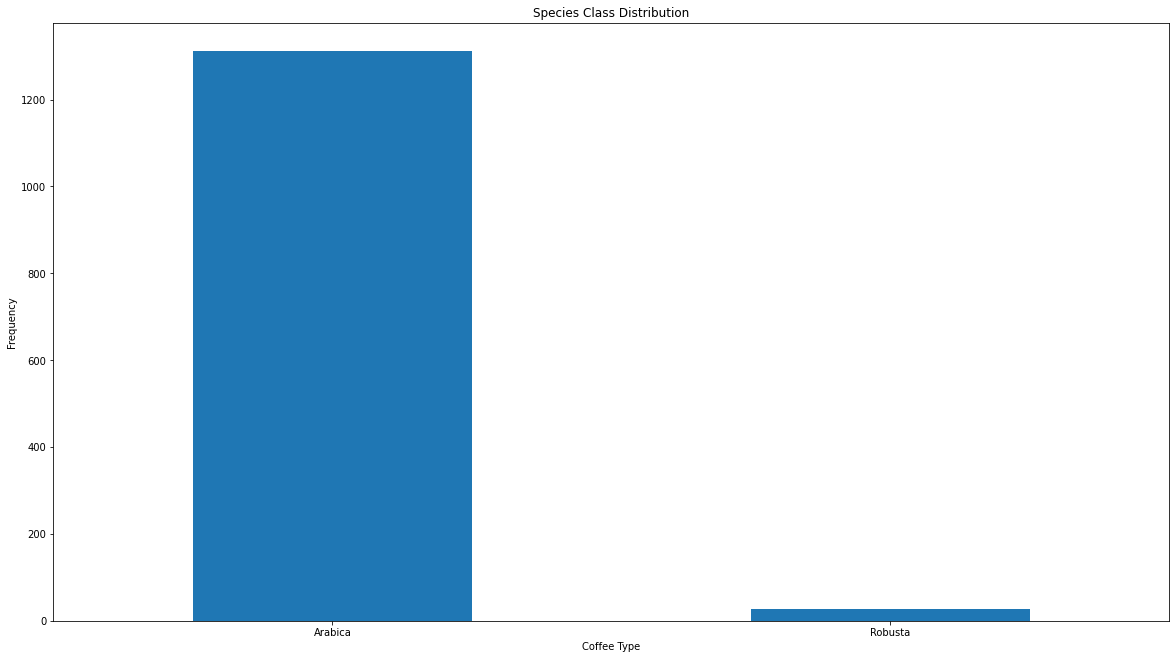

In [259]:
#plot the distributions of arabica and robusta coffees
count_classes = pd.value_counts(df['Species'])

count_classes.plot(kind = 'bar', rot=0)

plt.title("Species Class Distribution")


plt.xlabel("Coffee Type")

plt.ylabel("Frequency")

#### We can see that we are dealing with a highly imbalanced dataset. We may need to apply some sampling techniques before building a classification model.

Text(0, 0.5, 'Country Of Origin')

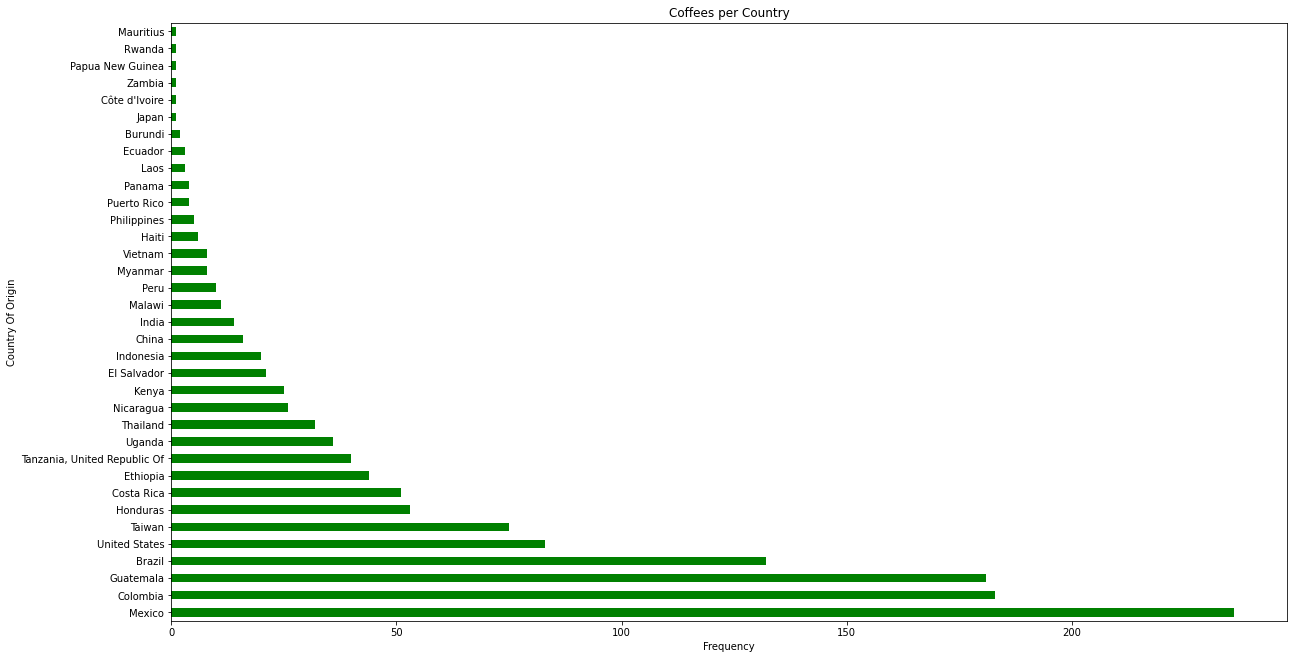

In [260]:
#change the country name of Coted?Ivoire to Côte d'Ivoire
df['Country.of.Origin'] = df['Country.of.Origin'].replace('Cote d?Ivoire',"Côte d'Ivoire")
df['Country.of.Origin'] = df['Country.of.Origin'].replace('United States (Hawaii)','United States')
df['Country.of.Origin'] = df['Country.of.Origin'].replace('United States (Puerto Rico)','Puerto Rico')
#plot the countries of origin
plt.rcParams["figure.figsize"] = (20,11)
df['Country.of.Origin'].value_counts().plot(kind='barh',color='green')
plt.title('Coffees per Country')

plt.xlabel("Frequency")

plt.ylabel("Country Of Origin")

#### From the graph, we can say that over 50 percent of datatset consists of coffee from Mexico,Columbia,Guatemala and Brazil.

#### We will try to visualise country of origins and their total average cupping scores in our dataset.

In [261]:
#Find the average of all total cup points grouping by country name
score_df=df.groupby('Country.of.Origin')['Total.Cup.Points'].mean().reset_index(name='Total_Avg_Points')

#function to convert to alpah2 country codes and continents
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)


#The below code is to ge the countries alpha2 code and continent code from the score_df country of origin and append codes
Codes_list=[]
Country_list=[]
Conti_list=[]
for i in score_df['Country.of.Origin']:
    Codes_list.append(get_continent(i))
    Country_list.append(get_continent(i)[0])
    Conti_list.append(get_continent(i)[1])
score_df['codes']=Codes_list
score_df['Country']=Country_list
score_df['Continent']=Conti_list


#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="get_country")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

#The below code is to get the coordinates for the countries based on the alpha2 code 
Geolocations=[]
for i in score_df['Country']:
    Geolocations.append(geolocate(i))
    
#add the coordinates column to the score_df dataframe
score_df['Geolocate']=Geolocations

#Let's see the final score dataframe after all these operations
score_df

,Country.of.Origin,Total_Avg_Points,codes,Country,Continent,Geolocate
0,Brazil,82.405909,"(BR, SA)",BR,SA,"(-10.3333333, -53.2)"
1,Burundi,81.830000,"(BI, AF)",BI,AF,"(50.6402809, 4.6667145)"
2,China,82.927500,"(CN, AS)",CN,AS,"(35.000074, 104.999927)"
3,Colombia,83.106557,"(CO, SA)",CO,SA,"(2.8894434, -73.783892)"
4,Costa Rica,82.789020,"(CR, NA)",CR,NA,"(45.22086405, 10.037037979628856)"
5,Côte d'Ivoire,79.330000,"(CI, AF)",CI,AF,"(7.9897371, -5.5679458)"
6,Ecuador,80.220000,"(EC, SA)",EC,SA,"(-1.3397668, -79.3666965)"
7,El Salvador,83.052857,"(SV, NA)",SV,NA,"(13.8000382, -88.9140683)"
8,Ethiopia,85.484091,"(ET, AF)",ET,AF,NaN
9,Guatemala,81.846575,"(GT, NA)",GT,NA,"(32.3293809, -83.1137366)"


In [262]:
#There are 3 missing values. Let us manually get the cordinates for the missing countries
#9.1450° N, 40.4897° E  #ET
#20.5937° N, 78.9629° E  #IN
#19.8563° N, 102.4955° E #LA Source:google

#replacing null values with tuples is not easy, so a small workaround to do that 
filler=[1,2,3]
score_df.loc[score_df.Geolocate.isnull(), 'Geolocate'] = filler

m = score_df['Geolocate'].eq(1)
score_df['Geolocate'] = score_df.loc[~m, 'Geolocate'].reindex(m.index, fill_value=(9.1450,40.4897)) #ET

m = score_df['Geolocate'].eq(2)
score_df['Geolocate'] = score_df.loc[~m, 'Geolocate'].reindex(m.index, fill_value=(20.5937,78.9629)) #IN

m = score_df['Geolocate'].eq(3)
score_df['Geolocate'] = score_df.loc[~m, 'Geolocate'].reindex(m.index, fill_value=(19.8563,102.4955)) #LA

#split the Geolocate columns to Latitude and Longitude
score_df[['Latitude', 'Longitude']] = pd.DataFrame(score_df['Geolocate'].tolist(), index=score_df.index)


In [263]:
# Create a world map to show total cupper points for all countries in the dataset
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(score_df)):
        lat = score_df.iloc[i]['Latitude']
        long = score_df.iloc[i]['Longitude']
        radius=5
        popup_text = """Country : {}<br>
                    Total Avg Points : {}<br>"""
        popup_text = popup_text.format(score_df.iloc[i]['Country.of.Origin'],
                                   round(score_df.iloc[i]['Total_Avg_Points'],2)
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

#### Here is the world map, you can explore this by zooming in and clicking on the blue coloured circle to get the country name and the total average points.

Text(0.5, 0, 'Average Total Cupping Score')

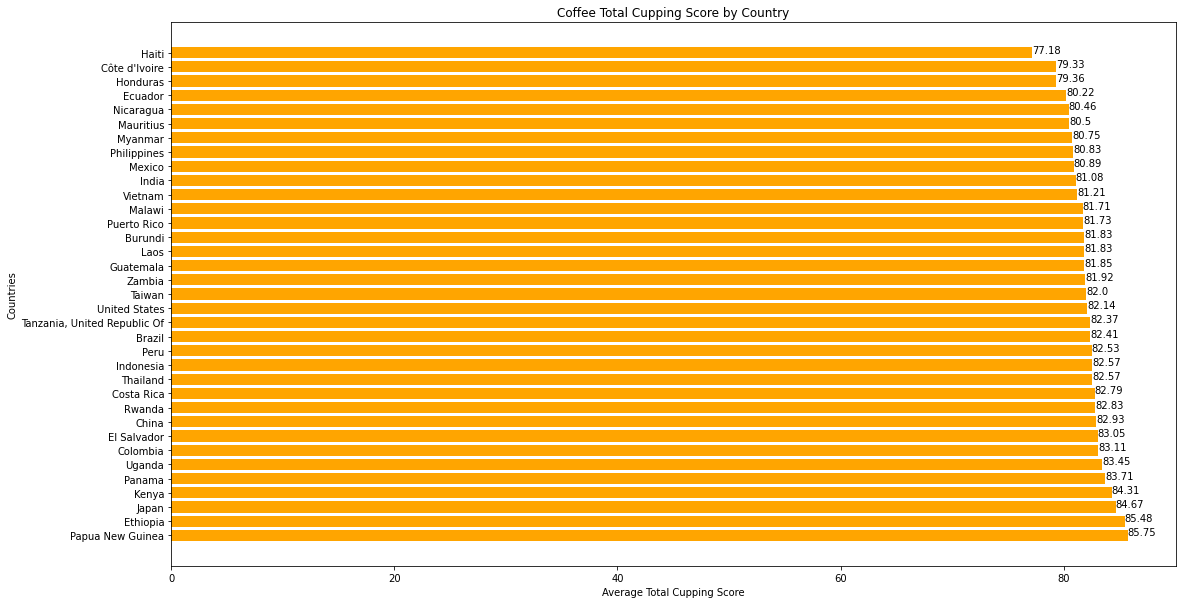

In [264]:
plt.figure(figsize=(18,10))
df_score_desc= score_df.sort_values('Total_Avg_Points',ascending=False)

for index, value in enumerate(df_score_desc['Total_Avg_Points']):
    plt.text(value, index,
             str(round(value,2)))
plt.barh(df_score_desc['Country.of.Origin'],df_score_desc['Total_Avg_Points'],color='orange',)
plt.title('Coffee Total Cupping Score by Country')
plt.ylabel("Countries")
plt.xlabel("Average Total Cupping Score")

#### We can observe from above bar chart that Papua New Guinea has the highest average total cup score followed by Ethiopia and Japan where as Haiti is at the least 

<AxesSubplot:>

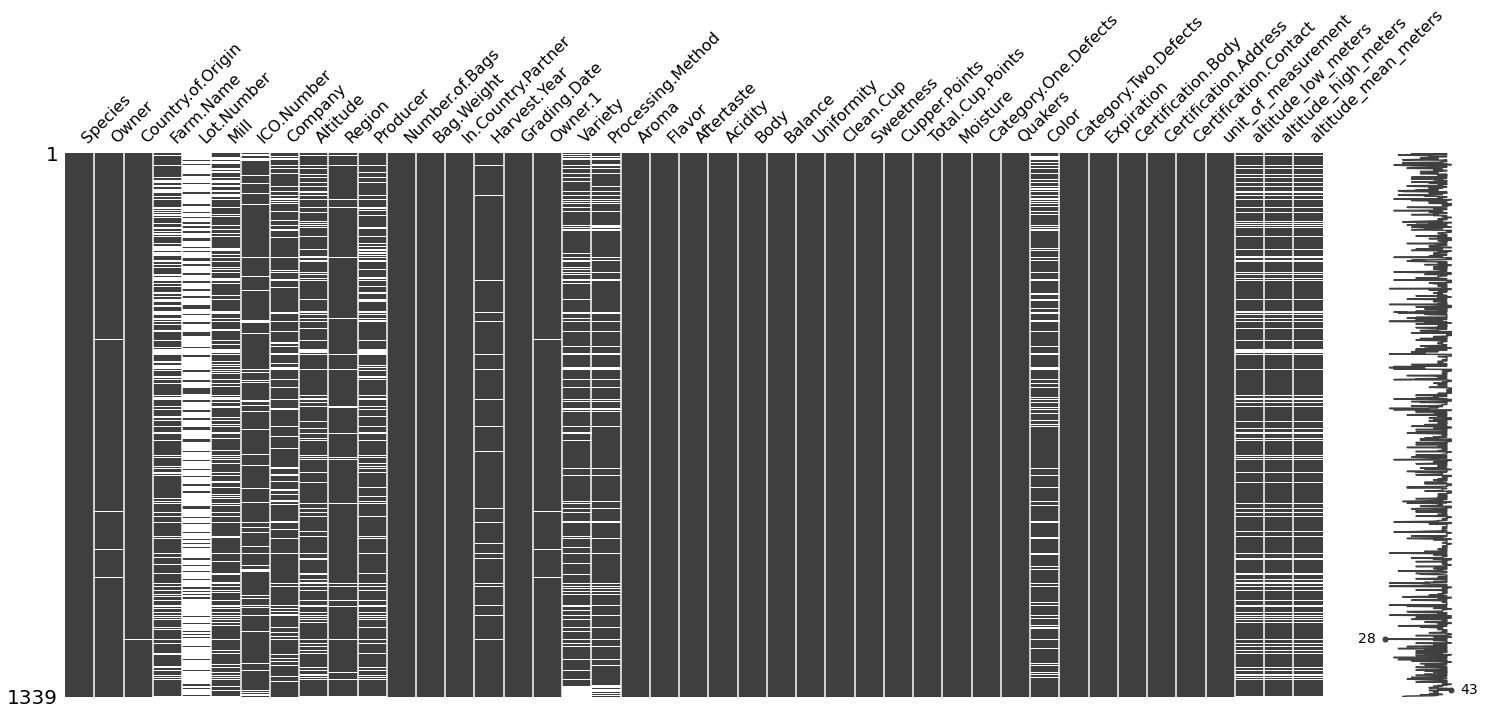

In [265]:
#visualise the missing values
msno.matrix(df)

#### We can observe that the columns like Lot number,Farm Name,altitude_low_meters,altitude_high_meters, altitude_mean_meters,etc have many missing values and we have to remove them. There are some obvious columns like Certification Body, Certification Address,Certification Contact which anyway has to be removed as they contain unidentified text.
#### We shall remove the ICO.Number,Altitude,Region,In Country Partner,Harvest Year,Grading Date from our dataset as it can lead to curse of dimensionality when there are more features and more focus for our problem is on building a good classification model.

#### According to the problem setting and also  [jldbc](https://github.com/jldbc/coffee-quality-database)  I feel 
Aroma
Flavor
Aftertaste
Acidity
Body
Balance
Uniformity
Cup Cleanliness
Sweetness
Moisture
Defects
#### are the important features for the classification model. I also prefer to try with two or more other categorical columns and see if it is making any difference with the correlation matrix.

In [266]:
#Encode arabica as 1 and robusta as 0 for the species column to make it machine ready
df['Species'].replace({'Arabica':1,'Robusta':0},inplace=True)

In [267]:
#Let's clean the dataframe by removing columns as discussed above
df.drop(['Lot.Number','Expiration','Certification.Body',
         'ICO.Number','Altitude','In.Country.Partner',
         'Harvest.Year','Grading.Date','Mill','Bag.Weight',
         'Certification.Address','Certification.Contact'],axis=1,inplace=True)

In [268]:
#check owner and owner.1 columns to remove duplicates
print(df['Owner'].value_counts())
print('----------------------------------------------------')
print(df['Owner.1'].value_counts())

juan luis alvarado romero           155
racafe & cia s.c.a                   60
exportadora de cafe condor s.a       54
kona pacific farmers cooperative     52
ipanema coffees                      50
                                   ... 
rolando lacayo                        1
juan luis ortega carballo             1
amkeni gourmet coffee group           1
jesus carlos cardenas valdivia        1
genius coffee                         1
Name: Owner, Length: 315, dtype: int64
----------------------------------------------------
Juan Luis Alvarado Romero                 155
Racafe & Cia S.C.A                         60
Exportadora de Cafe Condor S.A             54
Kona Pacific Farmers Cooperative           52
Ipanema Coffees                            50
                                         ... 
MARIA AMALIA GUADALUPE TORIELLO ELORZA      1
GERARDO HERNANDEZ VALDERRABANO              1
Damari Absalome                             1
yasmin Cofffee Plantation Plc               1
José Lui

In [269]:
#remove Owner.1 column as its same as Owner
df.drop(['Owner.1'],axis=1,inplace=True)

In [270]:
df['Color'].value_counts()

Green           870
Bluish-Green    114
Blue-Green       85
None             52
Name: Color, dtype: int64

#### Blue-Green and Bluish-Green are same, they have same RGB value. So replace Blue-Green with Bluish-Green

In [271]:
#replace Blue-Green with Bluish Green
df['Color'] = df['Color'].replace('Blue-Green','Bluish-Green')

In [275]:
df.dtypes

Species                   int64
Owner                    object
Country.of.Origin        object
Farm.Name                object
Company                  object
Region                   object
Producer                 object
Number.of.Bags            int64
Variety                  object
Processing.Method        object
Aroma                   float64
Flavor                  float64
Aftertaste              float64
Acidity                 float64
Body                    float64
Balance                 float64
Uniformity              float64
Clean.Cup               float64
Sweetness               float64
Cupper.Points           float64
Total.Cup.Points        float64
Moisture                float64
Category.One.Defects      int64
Quakers                 float64
Color                    object
Category.Two.Defects      int64
unit_of_measurement      object
altitude_low_meters     float64
altitude_high_meters    float64
altitude_mean_meters    float64
dtype: object

In [276]:
df.isnull().sum()

Species                   0
Owner                     7
Country.of.Origin         1
Farm.Name               359
Company                 209
Region                   59
Producer                232
Number.of.Bags            0
Variety                 226
Processing.Method       170
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean.Cup                 0
Sweetness                 0
Cupper.Points             0
Total.Cup.Points          0
Moisture                  0
Category.One.Defects      0
Quakers                   1
Color                   218
Category.Two.Defects      0
unit_of_measurement       0
altitude_low_meters     230
altitude_high_meters    230
altitude_mean_meters    230
dtype: int64

Caturra                  256
Bourbon                  226
Typica                   211
Other                    110
Catuai                    74
Hawaiian Kona             44
Yellow Bourbon            35
Mundo Novo                33
Catimor                   20
SL14                      17
SL28                      15
Pacas                     13
Gesha                     12
Pacamara                   8
SL34                       8
Arusha                     6
Peaberry                   5
Mandheling                 3
Sumatra                    3
Ethiopian Yirgacheffe      2
Blue Mountain              2
Ruiru 11                   2
Java                       2
Moka Peaberry              1
Pache Comun                1
Sumatra Lintong            1
Marigojipe                 1
Ethiopian Heirlooms        1
Sulawesi                   1
Name: Variety, dtype: int64

#### [Click here](http://proceedings.mlr.press/v7/niculescu09/niculescu09.pdf) KDD Cup Orange Challenge.

#### Instead of doing one-hot encoding for all categorical variables which will add many features when there are many cateogrical variables, In the winning solution of the KDD 2009 cup: "Winning the KDD Cup Orange Challenge with Ensemble":
#### The Team suggested using 10 most frequent labels and convert them into dummy variables using one-hotencoding.

In [251]:
def one_hot_encoding_top_x(df, variable, top_x_labels):
    # function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode
    
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)

In [252]:
# let's make a list with the most frequent categories of the variable

top_10_labels = [y for y in df['Country.of.Origin'].value_counts().sort_values(ascending=False).head(10).index]
top_10_labels

['Mexico',
 'Colombia',
 'Guatemala',
 'Brazil',
 'United States',
 'Taiwan',
 'Honduras',
 'Costa Rica',
 'Ethiopia',
 'Tanzania, United Republic Of']

In [234]:
#one_hot_encoding_top_x(df, 'Country.of.Origin', top_10_labels)
df.head()

,Species,Owner,Country.of.Origin,Farm.Name,Mill,ICO.Number,Company,Altitude,Region,Producer,...,Country.of.Origin_Mexico,Country.of.Origin_Colombia,Country.of.Origin_Guatemala,Country.of.Origin_Brazil,Country.of.Origin_United States,Country.of.Origin_Taiwan,Country.of.Origin_Honduras,Country.of.Origin_Costa Rica,Country.of.Origin_Ethiopia,"Country.of.Origin_Tanzania, United Republic Of"
1,1,metad plc,Ethiopia,metad plc,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,...,0,0,0,0,0,0,0,0,1,0
2,1,metad plc,Ethiopia,metad plc,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,...,0,0,0,0,0,0,0,0,1,0
3,1,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0
4,1,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,...,0,0,0,0,0,0,0,0,1,0
5,1,metad plc,Ethiopia,metad plc,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,...,0,0,0,0,0,0,0,0,1,0


In [188]:
### Apply SelectKBest Algorithm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X=df.iloc[:,1:]
y=df['Species']

X.drop(X.iloc[:, 0:10], inplace = True, axis = 1)
X.drop(X.iloc[:, 1:8], inplace = True, axis = 1)
X.drop(X.columns[[15,17,18,19,20,21]], axis = 1, inplace = True)

X['Quakers'] = X['Quakers'].fillna(X['Quakers'].mode()[0])

X['altitude_low_meters'] = X['altitude_low_meters'].fillna(X['altitude_low_meters'].mode()[0])

X['altitude_high_meters'] = X['altitude_high_meters'].fillna(X['altitude_high_meters'].mode()[0])
X['altitude_mean_meters'] = X['altitude_mean_meters'].fillna(X['altitude_mean_meters'].mode()[0])

ordered_rank_features=SelectKBest(score_func=chi2,k='all')
ordered_feature=ordered_rank_features.fit(X,y)
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,Number.of.Bags,35.410231
1,Aroma,0.069693
2,Flavor,0.046255
3,Aftertaste,0.097147
4,Acidity,0.055965
5,Body,0.090980
6,Balance,0.000419
7,Uniformity,0.014009
8,Clean.Cup,0.025206
9,Sweetness,15.514699


In [189]:
features_rank.nlargest(10,'Score')

,Features,Score
17,altitude_high_meters,1823.602602
18,altitude_mean_meters,1721.835598
16,altitude_low_meters,1621.934660
13,Category.One.Defects,368.275249
0,Number.of.Bags,35.410231
15,Category.Two.Defects,22.252943
9,Sweetness,15.514699
14,Quakers,4.954996
11,Total.Cup.Points,0.519305
10,Cupper.Points,0.253803


In [191]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [192]:
print(model.feature_importances_)

[0.02952215 0.02242468 0.01933799 0.02517546 0.02035541 0.02272097
 0.04043194 0.02423159 0.03295648 0.5287533  0.02202551 0.03865558
 0.01672677 0.03451785 0.00078805 0.01803211 0.0364912  0.03121392
 0.03563905]


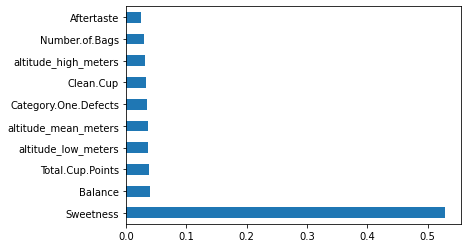

In [193]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [185]:
X=df.iloc[:,1:]
y=df['Species']
print(X.shape,y.shape)

(1339, 42) (1339,)


In [176]:
X.isnull().sum()

Owner                       7
Country.of.Origin           1
Farm.Name                 359
Lot.Number               1063
Mill                      318
ICO.Number                157
Company                   209
Altitude                  226
Region                     59
Producer                  232
Number.of.Bags              0
Bag.Weight                  0
In.Country.Partner          0
Harvest.Year               47
Grading.Date                0
Owner.1                     7
Variety                   226
Processing.Method         170
Aroma                       0
Flavor                      0
Aftertaste                  0
Acidity                     0
Body                        0
Balance                     0
Uniformity                  0
Clean.Cup                   0
Sweetness                   0
Cupper.Points               0
Total.Cup.Points            0
Moisture                    0
Category.One.Defects        0
Quakers                     1
Color                     218
Category.T

In [184]:
X.dtypes

Number.of.Bags            int64
Aroma                   float64
Flavor                  float64
Aftertaste              float64
Acidity                 float64
Body                    float64
Balance                 float64
Uniformity              float64
Clean.Cup               float64
Sweetness               float64
Cupper.Points           float64
Total.Cup.Points        float64
Moisture                float64
Category.One.Defects      int64
Quakers                 float64
Category.Two.Defects      int64
unit_of_measurement      object
altitude_low_meters     float64
altitude_high_meters    float64
altitude_mean_meters    float64
dtype: object

In [179]:
X.drop(X.iloc[:, 0:10], inplace = True, axis = 1)

In [181]:
X.drop(X.iloc[:, 1:8], inplace = True, axis = 1)

In [183]:
X.drop(X.columns[[15,17,18,19,20]], axis = 1, inplace = True)

In [143]:
X.drop(X.iloc[:, 0:10], inplace = True, axis = 1)
X.drop(X.iloc[:, 1:8], inplace = True, axis = 1)
X.drop(X.columns[[15,17,18,19,20,21,22]], axis = 1, inplace = True)

<AxesSubplot:>

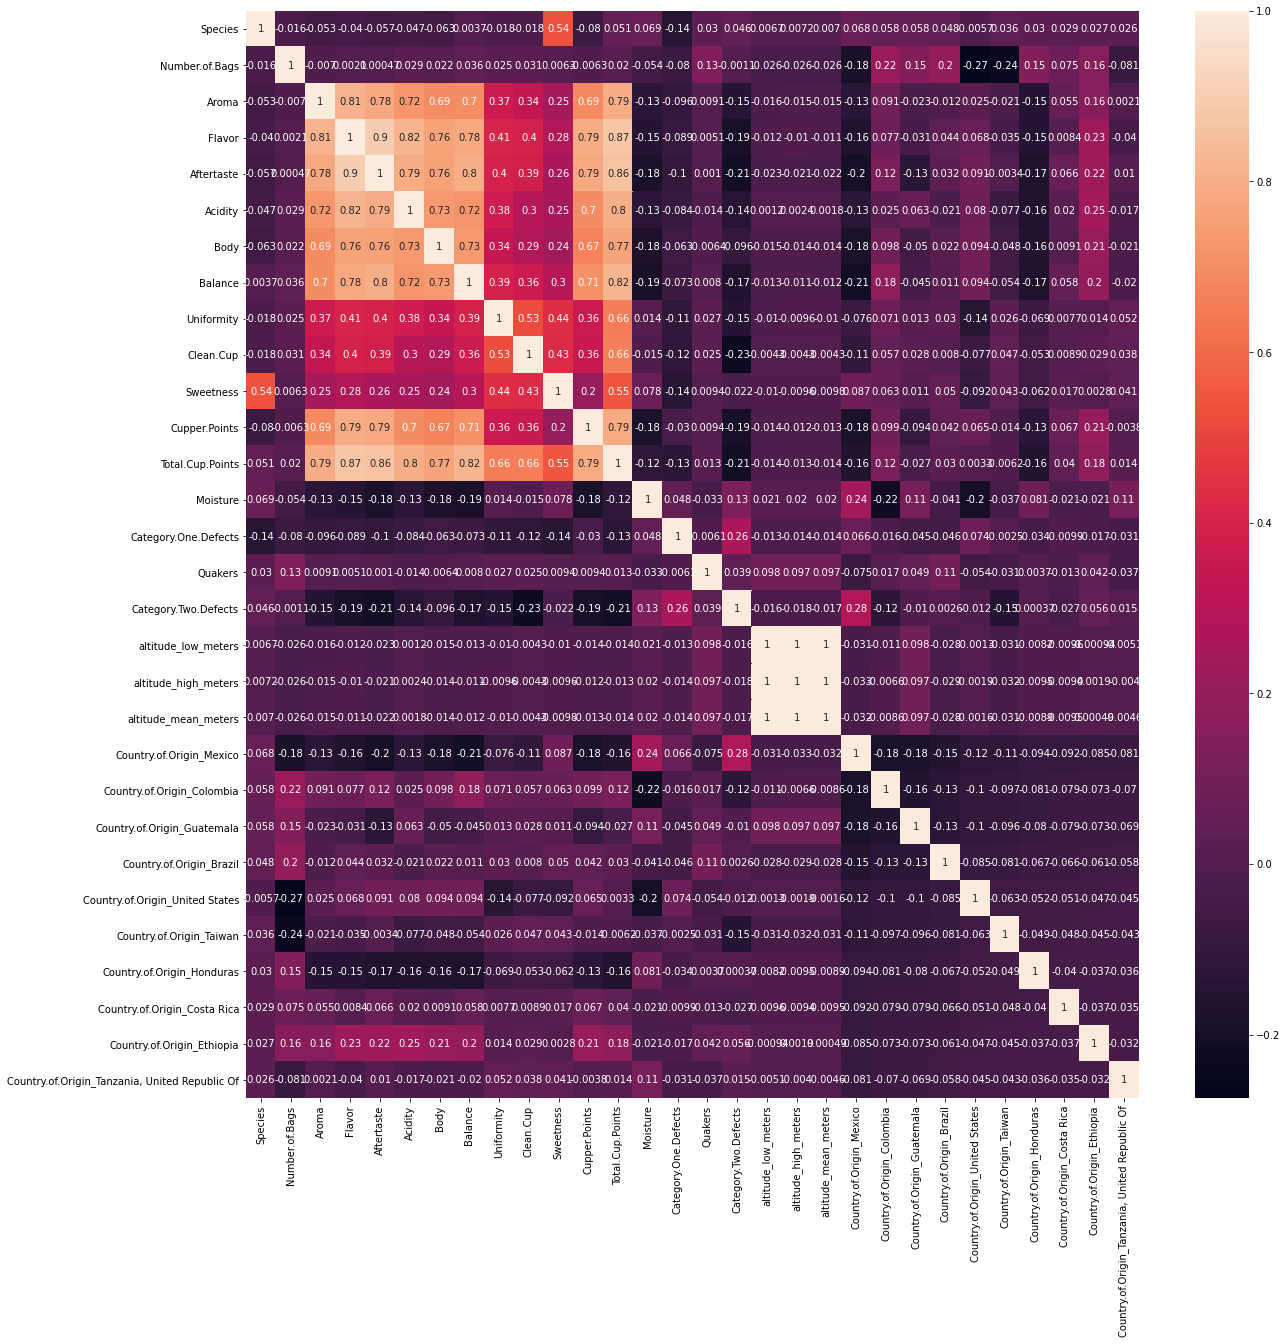

In [236]:
corr=df.iloc[:,:].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_features].corr(),annot=True)

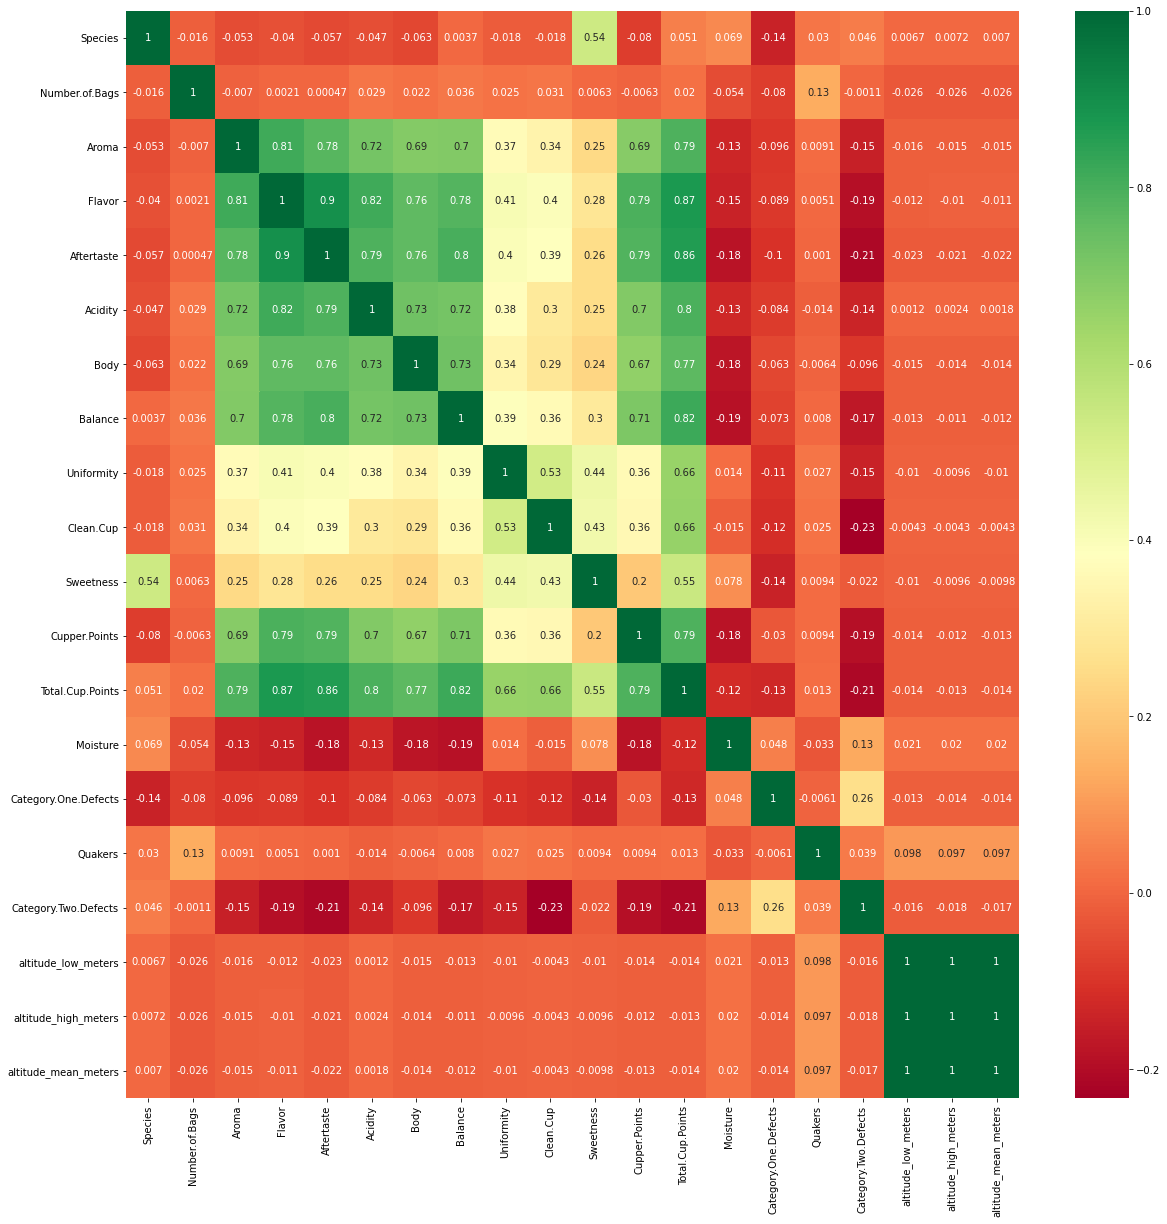

In [195]:
#X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [11]:
df_arab=df_arabica[['Species','Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Clean.Cup','Sweetness','Cupper.Points','Total.Cup.Points','Moisture']]

In [12]:
df_robu=df_robusta[['Species','Fragrance...Aroma','Flavor','Aftertaste','Salt...Acid','Bitter...Sweet','Mouthfeel','Uniform.Cup','Clean.Cup','Balance','Cupper.Points','Total.Cup.Points','Moisture']]

In [13]:
df_robu.head()

,Species,Fragrance...Aroma,Flavor,Aftertaste,Salt...Acid,Bitter...Sweet,Mouthfeel,Uniform.Cup,Clean.Cup,Balance,Cupper.Points,Total.Cup.Points,Moisture
1,Robusta,7.83,8.08,7.75,7.92,8.00,8.25,10.0,10.0,7.92,8.00,83.75,0.12
2,Robusta,8.00,7.75,7.92,8.00,8.00,7.92,10.0,10.0,7.92,8.00,83.50,0.00
3,Robusta,7.92,7.83,7.92,8.00,7.83,7.83,10.0,10.0,7.92,8.00,83.25,0.00
4,Robusta,8.00,7.92,7.92,7.75,7.75,7.83,10.0,10.0,7.75,8.08,83.00,0.12
5,Robusta,8.33,7.83,7.83,7.75,7.58,8.25,10.0,10.0,7.75,7.67,83.00,0.12


In [14]:
df_arab.head()

,Species,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture
1,Arabica,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12
2,Arabica,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12
3,Arabica,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00
4,Arabica,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11
5,Arabica,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12


In [15]:
df_robu.shape

(28, 13)

In [16]:
df_arab.shape

(1311, 13)

In [17]:
df_robu.isnull().sum()

Species              0
Fragrance...Aroma    0
Flavor               0
Aftertaste           0
Salt...Acid          0
Bitter...Sweet       0
Mouthfeel            0
Uniform.Cup          0
Clean.Cup            0
Balance              0
Cupper.Points        0
Total.Cup.Points     0
Moisture             0
dtype: int64

In [18]:
df_arab.isnull().sum()

Species             0
Aroma               0
Flavor              0
Aftertaste          0
Acidity             0
Body                0
Balance             0
Uniformity          0
Clean.Cup           0
Sweetness           0
Cupper.Points       0
Total.Cup.Points    0
Moisture            0
dtype: int64

In [19]:
df_robu.columns = ['Species','Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Clean.Cup','Sweetness','Cupper.Points','Total.Cup.Points','Moisture']

In [20]:
combined_df=pd.concat([df_arab,df_robu])

In [21]:
#reset the index
combined_df = combined_df.reset_index(drop=True)

In [22]:
combined_df.tail()

,Species,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture
1334,Robusta,7.75,7.58,7.33,7.58,7.75,5.08,10.00,10.00,7.83,7.83,78.75,0.00
1335,Robusta,7.50,7.67,7.75,7.75,8.42,5.17,10.00,10.00,5.25,8.58,78.08,0.00
1336,Robusta,7.33,7.33,7.17,7.42,7.42,7.50,9.33,9.33,7.17,7.17,77.17,0.00
1337,Robusta,7.42,6.83,6.75,7.17,7.08,7.25,9.33,9.33,7.00,6.92,75.08,0.10
1338,Robusta,6.75,6.67,6.50,6.83,6.67,6.92,9.33,9.33,6.83,7.92,73.75,0.12


In [23]:
combined_df['Species'].replace({'Arabica':1,'Robusta':0},inplace=True)

In [24]:
combined_df.Species.value_counts()

1    1311
0      28
Name: Species, dtype: int64

In [25]:
print(df_arab.shape,df_robu.shape)

(1311, 13) (28, 13)


In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, classification_report

In [120]:
# a helper function to draw confusion matrices
def draw_cm(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  df_cm = pd.DataFrame(cm_norm)
  plt.figure(figsize = (6,4))
  sns.heatmap(df_cm, annot=True, cmap="Blues")
  plt.xlabel("Predicted class")
  plt.ylabel("True class")
  plt.show()
  print("Accuracy: {0:.3f}".format(accuracy_score(y_test, y_pred)))
  print("Recall: {0:.3f}".format(recall_score(y_test, y_pred)))

In [78]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [92]:
# Implementing Oversampling for Handling Imbalanced 
X= combined_df.drop('Species', axis = 1)
Y=combined_df['Species']
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=0)
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X_train,y_train)

In [93]:
print(X.shape,Y.shape)

(1339, 12) (1339,)


In [94]:
print(X_train.shape,y_train.shape)

(1071, 12) (1071,)


In [95]:
print(X_test.shape,y_test.shape)

(268, 12) (268,)


In [96]:
y_train.value_counts()

1    1049
0      22
Name: Species, dtype: int64

In [97]:
y_res.value_counts()

1    1049
0    1049
Name: Species, dtype: int64

In [ ]:
combined_df = combined_df.sample(frac=1).reset_index(drop=True)

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

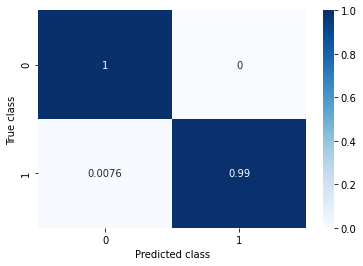

Accuracy: 0.993
Recall: 0.992


In [133]:
model = LogisticRegression(max_iter=500)
model.fit(X_res, y_res)
ypred = model.predict(X_test)
evaluation = f1_score(y_test, ypred)
evaluation
draw_cm(y_test,ypred)

In [134]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, ypred)

0.8627136310272983

In [112]:
print(classification_report(y_test, ypred, target_names=['Robusta','Arabica']))

              precision    recall  f1-score   support

     Robusta       0.75      1.00      0.86         6
     Arabica       1.00      0.99      1.00       262

    accuracy                           0.99       268
   macro avg       0.88      1.00      0.93       268
weighted avg       0.99      0.99      0.99       268



In [113]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.99      1.00       262

    accuracy                           0.99       268
   macro avg       0.88      1.00      0.93       268
weighted avg       0.99      0.99      0.99       268



In [101]:
confusion_matrix(y_test, ypred)

array([[  6,   0],
       [  2, 260]], dtype=int64)

In [129]:
X_train[['Flavor','Acidity']]

,Flavor,Acidity
813,7.33,7.42
1036,7.33,6.83
194,7.75,7.92
240,7.75,7.75
1169,6.92,7.42
...,...,...
763,7.50,7.42
835,7.50,7.50
1216,7.17,7.58
559,7.58,7.58


0.9980952380952381


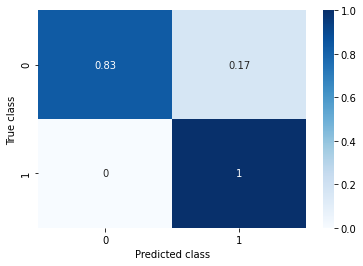

Accuracy: 0.996
Recall: 1.000


In [139]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
evaluation = f1_score(y_test, ypred)
print(evaluation)
draw_cm(y_test,ypred)

In [140]:
matthews_corrcoef(y_test, ypred)

0.9111337802573134

In [131]:
print(classification_report(y_test, ypred, target_names=['Robusta','Arabica']))

              precision    recall  f1-score   support

     Robusta       0.00      0.00      0.00         6
     Arabica       0.98      0.99      0.98       262

    accuracy                           0.97       268
   macro avg       0.49      0.50      0.49       268
weighted avg       0.96      0.97      0.96       268



In [116]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00       262

    accuracy                           1.00       268
   macro avg       1.00      0.92      0.95       268
weighted avg       1.00      1.00      1.00       268



In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#wrf = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

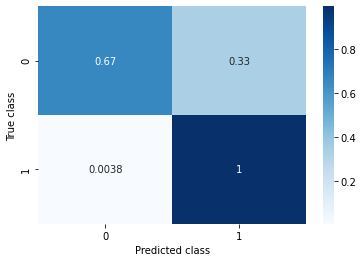

Accuracy: 0.989
Recall: 0.996


In [137]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
evaluation = f1_score(y_test, ypred)
evaluation
draw_cm(y_test,ypred)

In [138]:
matthews_corrcoef(y_test, ypred)

0.7247338923878783

In [118]:
print(classification_report(y_test, ypred, target_names=['Robusta','Arabica']))

              precision    recall  f1-score   support

     Robusta       0.86      1.00      0.92         6
     Arabica       1.00      1.00      1.00       262

    accuracy                           1.00       268
   macro avg       0.93      1.00      0.96       268
weighted avg       1.00      1.00      1.00       268



In [119]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00       262

    accuracy                           1.00       268
   macro avg       0.93      1.00      0.96       268
weighted avg       1.00      1.00      1.00       268



In [132]:
#descision tree
confusion_matrix(y_test, ypred)


array([[  0,   6],
       [  2, 260]], dtype=int64)

In [105]:
#Random Forest
confusion_matrix(y_test, ypred)


array([[  6,   0],
       [  1, 261]], dtype=int64)